Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura da base de dados
df_best = pd.read_csv('data/best_selling_video_games.csv')

Inspesao do DataFrame

In [3]:
display(df_best.head(3))
display(df_best.tail(3))
display(df_best.shape)
display(df_best.info())
display(df_best.isnull().sum())

,Rank,Title,Platform(s),Developer(s),Publisher(s),Ref.,Releaseyear,Sales(millions),Series,Table_Number
0,1,Minecraft,Multi-platform,Mojang Studios,Mojang Studios,NaN,2011[b],350,Minecraft,1
1,2,Grand Theft Auto V,Multi-platform,Rockstar North,Rockstar Games,NaN,2013,225,Grand Theft Auto,1
2,3,Wii Sports[a],Wii,Nintendo EAD,Nintendo,NaN,2006,82.9,Wii,1


,Rank,Title,Platform(s),Developer(s),Publisher(s),Ref.,Releaseyear,Sales(millions),Series,Table_Number
47,48,Pokémon Sun/Moon/Ultra Sun/Ultra Moon,Nintendo 3DS,Game Freak,Nintendo/The Pokémon Company,[s],2016,25.59,Pokémon,1
48,49,Garry's Mod,PC,Facepunch Studios,Valve,NaN,2006,25.56,NaN,1
49,50,Pokémon Diamond/Pearl/Platinum,Nintendo DS,Game Freak,Nintendo/The Pokémon Company,[t],2006,25.5,Pokémon,1


(50, 10)

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Rank             50 non-null     str  
 1   Title            50 non-null     str  
 2   Platform(s)      50 non-null     str  
 3   Developer(s)     50 non-null     str  
 4   Publisher(s)     42 non-null     str  
 5   Ref.             10 non-null     str  
 6   Releaseyear      50 non-null     str  
 7   Sales(millions)  49 non-null     str  
 8   Series           45 non-null     str  
 9   Table_Number     50 non-null     int64
dtypes: int64(1), str(9)
memory usage: 4.0 KB


None

Rank                0
Title               0
Platform(s)         0
Developer(s)        0
Publisher(s)        8
Ref.               40
Releaseyear         0
Sales(millions)     1
Series              5
Table_Number        0
dtype: int64

Tratamento e limpeza do DataFrame

In [4]:
# Criacao de uma mascara para identificar valores numericos na coluna (Rank)
# A coluna e convertida temporariamente para string para aplicar a verificacao
mask_numerico = df_best['Rank'].astype(str).str.fullmatch(r"\d+")

# Filtragem do DataFrame apenas com valores validos do (Rank)
df_best = df_best[mask_numerico]

# Remocao de uma coluna da referencia que nao sera utilizada na analise.
df_best = df_best.drop(columns=["Ref."])

# Conversao da coluna (Rank) para tipo inteiro (int).
df_best['Rank'] = df_best['Rank'].astype(int)

# Remocao de espacos em branco antes e depois dos valores.
df_best['Releaseyear'] = df_best['Releaseyear'].str.strip()

# Remocao de caracteres especias e alfabeticos que possam estar misturados com o ano.
df_best['Releaseyear'] = df_best['Releaseyear'].str.replace(r"[\[\]]", "", regex=True)
df_best['Releaseyear'] = df_best['Releaseyear'].str.replace(r"[A-Za-z]", "", regex=True)

# Conversao da variavel (Releaseyear) para formato numerico.
df_best['Releaseyear'] = pd.to_numeric(df_best['Releaseyear'], errors='coerce')

# Conversao da coluna (Sales (millions)) para tipo ponto flutuante (float).
df_best['Sales(millions)'] = df_best['Sales(millions)'].astype(float)

# Conversao da coluna (Table_Number) para tipo inteiro (int).
df_best['Table_Number'] = df_best['Table_Number'].astype(int)

# Calculo da moda da coluna (Series)
# Preenchimento dos valores ausentes com a moda, por ser a categoria mais frequente.
moda_coluna = df_best['Series'].mode()[0]
df_best['Series'] = df_best['Series'].fillna(moda_coluna)

#
df_best['Platform(s)'] = df_best['Platform(s)'].str.strip().str.lower()

# Visualizacao das primeiras linhas apos o tratamento.
# Visualizacao final dos tipos de dados e valores ausentes.
display(df_best.head(3))
display(df_best.info())

,Rank,Title,Platform(s),Developer(s),Publisher(s),Releaseyear,Sales(millions),Series,Table_Number
0,1,Minecraft,multi-platform,Mojang Studios,Mojang Studios,2011,350.0,Minecraft,1
1,2,Grand Theft Auto V,multi-platform,Rockstar North,Rockstar Games,2013,225.0,Grand Theft Auto,1
2,3,Wii Sports[a],wii,Nintendo EAD,Nintendo,2006,82.9,Wii,1


<class 'pandas.DataFrame'>
Index: 42 entries, 0 to 49
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             42 non-null     int64  
 1   Title            42 non-null     str    
 2   Platform(s)      42 non-null     str    
 3   Developer(s)     42 non-null     str    
 4   Publisher(s)     42 non-null     str    
 5   Releaseyear      42 non-null     int64  
 6   Sales(millions)  42 non-null     float64
 7   Series           42 non-null     str    
 8   Table_Number     42 non-null     int64  
dtypes: float64(1), int64(3), str(5)
memory usage: 3.3 KB


None

Analise Exploratoria

count     42.000000
mean      51.915476
std       57.516709
min       25.500000
25%       28.005000
50%       34.070000
75%       49.830000
max      350.000000
Name: Sales(millions), dtype: float64

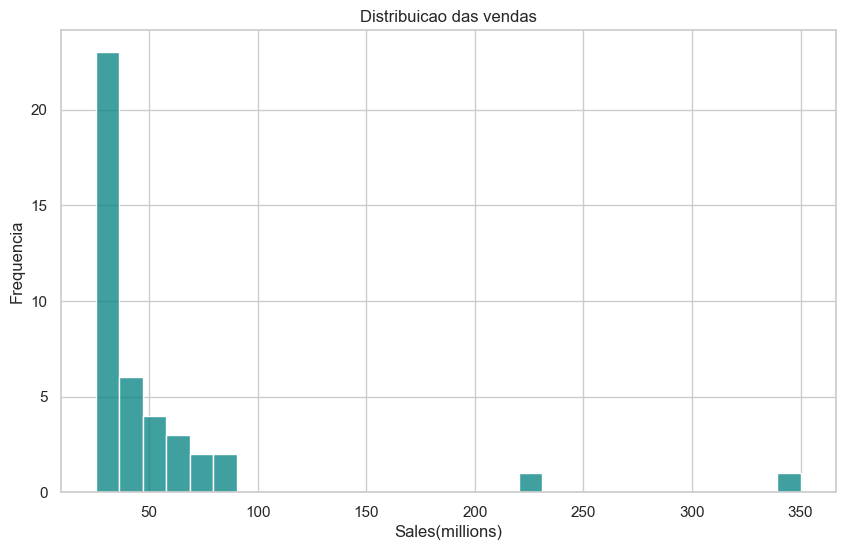

In [5]:
#Estatisticas descritivas da variavel de vendas
# Aqui analisamos medidas como media, mediana, minimo, maximo e dispersao.
# O que permite compreender o comportamento geral das vendas em milhoes.
display(df_best["Sales(millions)"].describe())

# Visualizacao grafica da distribuicao da vendas em milhoes.
# Definicao do estilo do grafico
sns.set_theme(style='whitegrid')
# Tamanho da figura
plt.figure(figsize=(10, 6))
# Construcao do histograma das vendas
# Utiliza -se o dropna() para remover valores aussentes, evitando distorcoes na distribuicao dos dados.
sns.histplot(df_best['Sales(millions)'].dropna(), bins=30, color='teal')
# Titulo e rotulos dos eixos para facilitar a interpretacao
plt.title('Distribuicao das vendas')
plt.xlabel('Sales(millions)')
plt.ylabel('Frequencia')
plt.show()

,Sales(millions)
Platform(s),
pc,25.56
nintendo 3ds,25.59
ps3/ps4,26.60
famicom / nes,28.30
game boy color,30.12
game boy,35.00
nintendo ds,56.30
wii u/switch,79.05
nintendo switch,172.19


Sales(millions)
Publisher(s)                   Title                                                   
Activision                     Call of Duty: Black Ops                            26.20
                               Call of Duty: Black Ops III                        43.00
                               Call of Duty: Modern Warfare                       41.00
                               Call of Duty: Modern Warfare 3                     26.50
Bandai Namco                   Elden Ring                                         30.00
Blizzard Entertainment         Overwatch                                          50.00
CD Projekt                     The Witcher 3: Wild Hunt                           60.00
Capcom                         Monster Hunter: World                              29.10
Curve Digital                  Human: Fall Flat                                   55.00
Electronic Arts                It Takes Two                                       27.00
Game Science                   Black Myth: Wukong                                 28.00
Krafton                        PUBG: Battlegrounds                                75.00
Mojang Studios                 Minecraft                                         350.00
Nintendo                       Animal Crossing: New Horizons                      49.32
                               Duck Hunt[o]                                       28.30
                               Mario Kart 8/Deluxe                                79.05
                               Mario Kart Wii[i]                                  37.38
                               New Super Mario Bros.                              30.80
                               New Super Mario Bros. Wii                          30.32
                               Pokémon Gold/Silver/Crystal                        30.12
                               Pokémon Red/Blue/Yellow                            47.44
                               Super Mario Bros.[d]                               58.00
                               Super Mario Odyssey                                30.27
                               Super Smash Bros. Ultimate                         37.44
                               Tetris(Game Boy)[k]                                35.00
                               The Legend of Zelda: Breath of the Wild            35.34
                               Wii Fit/Plus[f]                                    43.80
                               Wii Play[p]                                        28.02
                               Wii Sports Resort[l]                               33.14
                               Wii Sports[a]                                      82.90
Nintendo/The Pokémon Company   Pokémon Diamond/Pearl/Platinum                     25.50
                               Pokémon Scarlet/Violet                             28.08
                               Pokémon Sun/Moon/Ultra Sun/Ultra Moon              25.59
                               Pokémon Sword/Shield                               27.08
Re-Logic/505 Games             Terraria                                           64.00
Rockstar Games                 Grand Theft Auto V                                225.00
                               Grand Theft Auto: San Andreas                      27.50
                               Red Dead Redemption 2                              82.00
Sony Computer Entertainment    The Last of Us/Remastered                          26.60
Sony Interactive Entertainment Marvel's Spider-Man/Remastered                     26.10
Valve                          Garry's Mod                                        25.56
Warner Bros. Games             Hogwarts Legacy                                    40.00

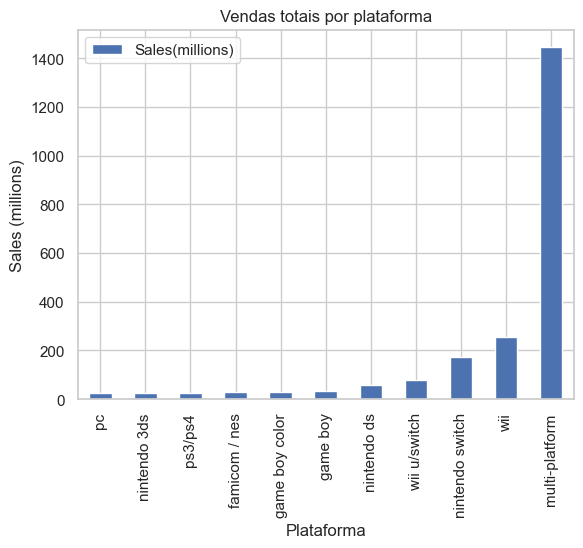

In [6]:
# Agrupamento das vendas por plataforma
plataforma_vende = df_best[['Platform(s)', 'Sales(millions)']].groupby('Platform(s)').sum().sort_values(by='Sales(millions)', ascending=True)

# Visualizacao em graficos de barras
plataforma_vende.plot.bar(
    title='Vendas totais por plataforma',
    ylabel='Sales (millions)',
    xlabel='Plataforma'
)

# Agrupamento das vendas por editora e jogo
# Essa analise permite identificar os jogod mais vendidos dentro de cada editora.
vendas_por_jogo_e_empresa = df_best[["Title", "Publisher(s)", "Sales(millions)"]].groupby(["Publisher(s)", "Title"]).sum()
display(plataforma_vende)
display(vendas_por_jogo_e_empresa)

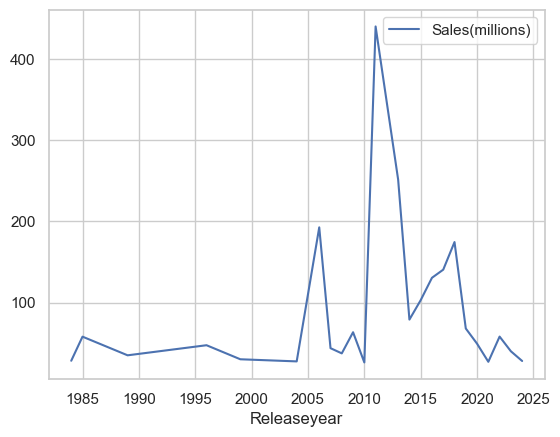

In [7]:
distribuicao_temporal_das_vendas = df_best[['Sales(millions)', 'Releaseyear']].groupby(['Releaseyear']).sum().plot.line()
plt.show()